# Project: Investigate TMBD moive Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project done for Data Analyst Nanodegree for which I've chossen TMDb movies dataset. \
This dataset contains 10866 samples of data and 21 columns.\
It includes columns like movie budget, revenue, popularity, cast, etc.

In [16]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
except:
    print("error")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data


#loading the TMBD-MOVIES dataset
df = pd.read_csv('./data/tmdb-movies.csv')

#   types and look for instances of missing or possibly errant data.

# printing first 3 rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [18]:
try:
    print(df.shape)
except:
    print("error")

(10866, 21)


>### Observations:
    1. Number of sample rows: 10866
    2. Number of columns: 21

In [19]:
try:
    df.columns
except:
    print("error")

>### <u><b>NOTE:</b></u>
Columns that are not usefull for analysis are:
    1. id
    2. imdb_id
    3. homepage
    4. production companies
    5. keyword
    6. budget_adj
    7. revenue_adj
>### Droping columns which are not usefull

In [20]:
try:
    df.drop(["id", "imdb_id", "homepage", "production_companies", "keywords", "budget_adj", "revenue_adj"], axis=1, inplace=True)
except:
    print("error")
df.head(2)

,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


### Data Cleaning 
    1. Checking and removing all Null values.
    2. Checking and removing duplicate values.
    3. Checking and updating datatypes of columns.

## 1. Checking Null values and removing them

In [21]:
try:
    # Checking for Null values in each columns

    missing_data = df.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(" ")
except:
    print("error")

popularity
False    10866
Name: popularity, dtype: int64
 
budget
False    10866
Name: budget, dtype: int64
 
revenue
False    10866
Name: revenue, dtype: int64
 
original_title
False    10866
Name: original_title, dtype: int64
 
cast
False    10790
True        76
Name: cast, dtype: int64
 
director
False    10822
True        44
Name: director, dtype: int64
 
tagline
False    8042
True     2824
Name: tagline, dtype: int64
 
overview
False    10862
True         4
Name: overview, dtype: int64
 
runtime
False    10866
Name: runtime, dtype: int64
 
genres
False    10843
True        23
Name: genres, dtype: int64
 
release_date
False    10866
Name: release_date, dtype: int64
 
vote_count
False    10866
Name: vote_count, dtype: int64
 
vote_average
False    10866
Name: vote_average, dtype: int64
 
release_year
False    10866
Name: release_year, dtype: int64
 


>### Observations:
    1. Column cast has 76 Null values
    2. Column director has 44 Null values
    3. Column tagline has 2824 Null values
    4. Column overview has 4 Null values
    5. Column genres has 23 Null values

> #### Identifing missing values and Replacing missing values to NaN
       a. "?" to NaN
       b. "0" to NaN

In [24]:
try:
    #"?" to NaN
    df.replace ("?", np.NaN, inplace=True)

    #"0" to NaN
    df.replace(0, np.NaN, inplace=True)


    #droping All Null values
    df = df.dropna(axis=0)
except:
    print("error")
df.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [26]:
try:
    print(df.isnull().sum())
except:
    print("error")

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
tagline           0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64


>### Observations:
    1. There is no Null Values left in the Dataset.

## 2. Checking and removing Duplicate entries

In [27]:
try:
    print(df.duplicated().sum())
except:
    print("error")

1


In [28]:
try:
    df.drop_duplicates(inplace=True)
    print(df.duplicated().sum())
except:
    print("error")

0


>### Observations:
    1. Total Duplicate entries = 1
    2. There is no Duplicate entries left in Dataset.

## 3. Checking and updating datatypes of columns.

In [30]:
try:
    print(df.dtypes)
except:
    print("error")

popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
overview           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
dtype: object


In [32]:
try:
    df['budget'] = df['budget'].astype(int)
    df['revenue'] = df['revenue'].astype(int)
    df['release_date'] = df['release_date'].astype('datetime64[ns]')
except:
    print("error")

In [34]:
try:
    print(df.dtypes)
except:
    print("error")

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
overview                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object


>### Observations:
    1. DataType of budget changed from float to int.
    2. DataType of revenue changed from float to int.
    3. DataType of release_date changed from object to string.

<a id='eda'></a>
## Exploratory Data Analysis

<ul>
<li><a href="#Research Question 1">Research Question 1 </a></li>
<li><a href="#Research Question 2">Research Question 2</a></li>
</ul>


<a id='Research Question 1'></a>
### Research Question 1 
    1. Boxlot 
    2. Histogram
    3. Scatter Matrix

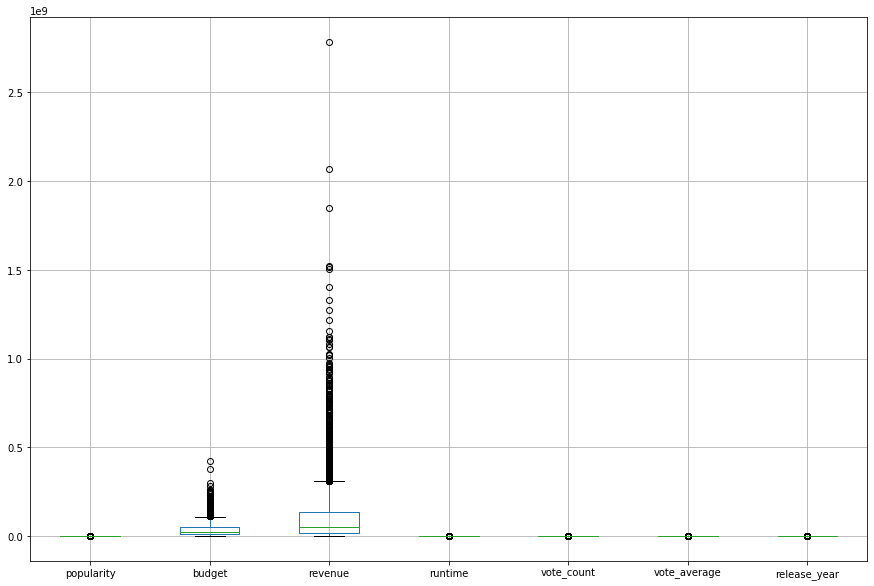

In [35]:
try:
    #plotting Histogram of each column
    df.boxplot(figsize=(15,10))
except:
    print("error")

### Observations:
    1. Vlaues are too small hard to judge and predict.

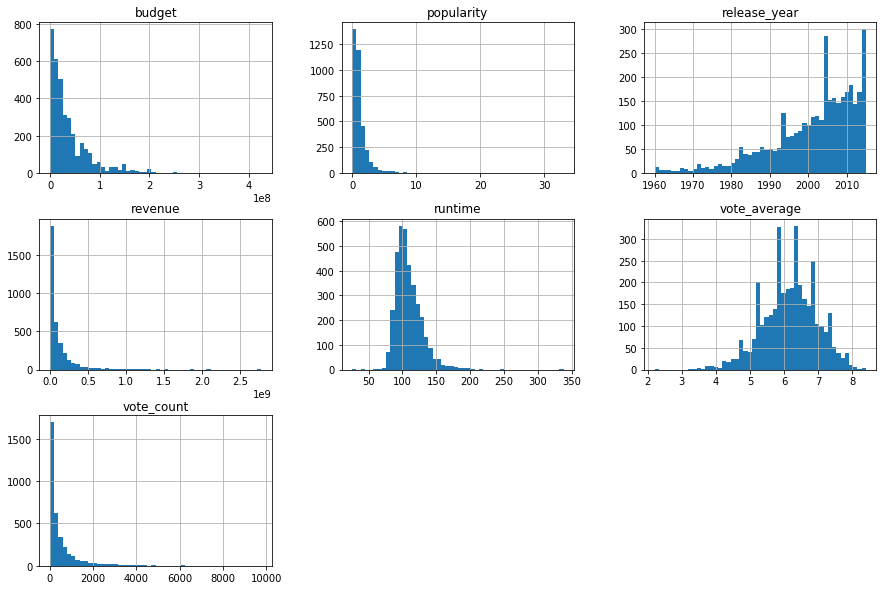

In [36]:
try:
    df.hist(figsize=(15,10), bins=50)
except:
    print("error")

### Observations: 
    1. Most of the budget values lies between 0 and 0.5 and it is right skewed.
    2. highest Popularity lies between 0 and 4 and it is right skewed.
    3. Most of the movied was relaeased between 2005 to 2015 and it is rileftght skewed.
    4. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale and it is 
       right skewed.
    5. Most of the movies are have runtime between 80 to 120 minutes and it is right skewed.
    6. Vote average has a bit scattered distribution than other variables with most movies lying in the range of
       6-7 voting average and it is left skewed.
    7. Highest vote_count lies between 0-100 and it is right skewed.

<a id='Research Question 2'></a>
### Research Question 2 
    1. Relation between profit and budget
    2. Relation between profit and revenue
    3. Relation between profit and popularity

In [38]:
try:
    df['profit'] = df['revenue'] - df['budget']
    print(df['profit'].head(3))
except:
    print("error")

0    1363528810
1     228436354
2     185238201
Name: profit, dtype: int64


In [69]:
try:
    print(df['profit'].mean())
    print(df['budget'].mean())
    print(df['revenue'].mean())
    print(df['runtime'].mean())
except:
    print('error')

75118992.06159015
38714747.10414334
113833739.16573349
109.12290033594626


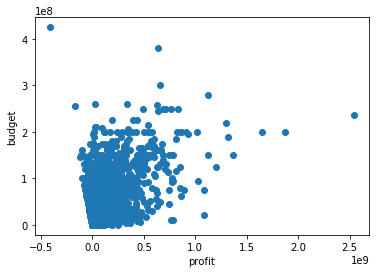

In [70]:
try:
    X = df['profit']
    Y = df['budget']
    plt.xlabel('profit')
    plt.ylabel('budget')

    plt.scatter(X,Y)
    plt.show()
except:
    print('error')

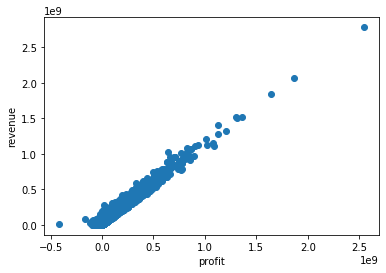

In [71]:
try:
    X = df['profit']
    Y = df['revenue']
    plt.xlabel('profit')
    plt.ylabel('revenue')

    plt.scatter(X,Y)
    plt.show()
except:
    print('error')

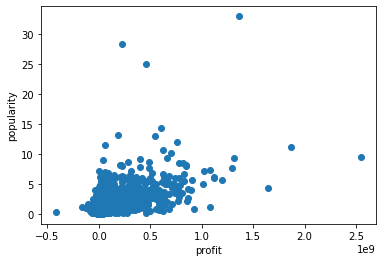

In [72]:
try:
    X = df['profit']
    Y = df['popularity']
    plt.xlabel('profit')
    plt.ylabel('popularity')

    plt.scatter(X,Y)
    plt.show()
except:
    print('error')

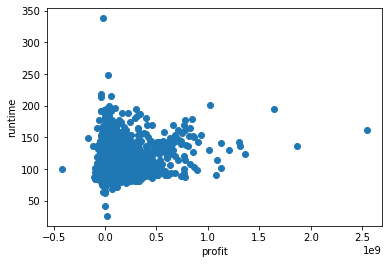

In [73]:
try:
    X = df['profit']
    Y = df['runtime']
    plt.xlabel('profit')
    plt.ylabel('runtime')

    plt.scatter(X,Y)
    plt.show()
except:
    print('error')

### Observations:
    1. Profit vs Budget shows the highest positive relationship
    2. Profit vs Revenue shows the highest positive relationship
    3. Profit vs Popularity shows positive relationship. 
    4. Profit vs runtime shows positive relationship. 

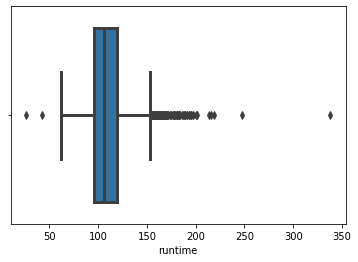

In [74]:
try:
    sns.boxplot(df['runtime'], linewidth = 3)
except:
    print('error')

> ### Observations:
    1. The distribution of the above formed graph is positively skewed.
    2. Most of the movies are timed between 80 to 120 minutes.

<a id='conclusions'></a>
## Conclusions


>#### Here I conclude my analysis for TMDB Movies Dataset with the summary of the observations from the above
        1. Most of the budget values lies between 0 and 0.5 and it is right skewed.
        2. highest Popularity lies between 0 and 4 and it is right skewed.
        3. Most of the movied was relaeased between 2005 to 2015 and it is rileftght skewed.
        4. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale and it is 
           right skewed.
        5. Most of the movies are have runtime between 80 to 120 minutes and it is right skewed.
        6. Vote average has a bit scattered distribution than other variables with most movies lying in the range of
           6-7 voting average and it is left skewed.
        7. Highest vote_count lies between 0-100 and it is right skewed.
        8. Average budget of Movies are: 37203696.95
        9. Average Runtime of Movies are: 109.22
        10. Average Runtime of Movies are: 109.22
        11. The distribution of the above formed graph is positively skewed.

>#### Limitations
        1. Most of the NUll values were dropped. So many key values got lost.
        2. Both Budget and revenue doesn't have currecncy specified. But movies were made in 
           different countries due to which there is a fluctuation in currency. Although we've 
           taken currecny in Dollars which is world wide acceptable currency.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-project.ipynb'])

0